<a href="https://colab.research.google.com/github/ovazque/ML/blob/main/MedicalCost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Content
- Data visualization
- Data pre-processing
- Stratified sampling for generating the training and testing sets
- Application of a Linear regression model
- K-fold cross-validation

## Columns

- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance


In [ ]:
# Reading a csv file from github
# Go to the dataset in your GitHub repository, and then click on “View Raw”.
# Copy the link to the raw dataset and pass it as a parameter to the read_csv() in pandas to get the dataframe.

url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"

import pandas as pd
insurance_data = pd.read_csv(url)
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


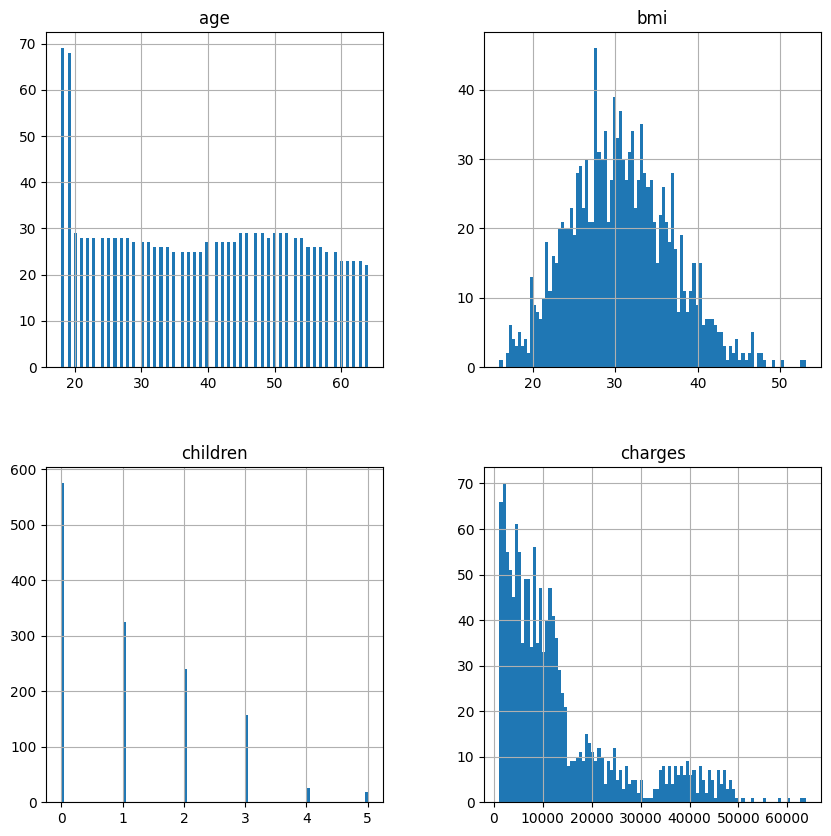

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
insurance_data.hist(bins=100, figsize=(10,10))
plt.show()

In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
insurance_data["age_cat"] = pd.cut(insurance_data["age"], bins=[0, 20, 40, 60, 80], labels=[1,2,3,4])

<Axes: >

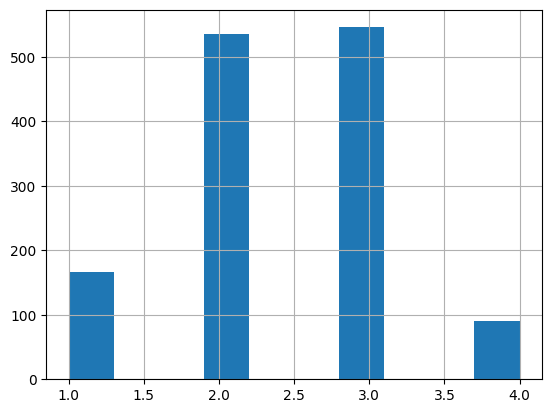

In [ ]:
insurance_data["age_cat"].hist()

# Creating the train and test data sets: Random generation

In [ ]:
import numpy as np
def split_train_test(data, test_ratio):
  np.random.seed(42)
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data)*test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set, test_set = split_train_test(insurance_data,0.2)

# Creating the train and test data sets: Stratified sampling

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(insurance_data, insurance_data["age_cat"]):
  strat_train_set = insurance_data.loc[train_index]
  strat_test_set = insurance_data.loc[test_index]

In [ ]:
insurance_data["age_cat"].value_counts()/len(insurance_data)

3    0.408072
2    0.399851
1    0.124066
4    0.068012
Name: age_cat, dtype: float64

In [ ]:
train_set, test_set = split_train_test(insurance_data,0.2)

In [ ]:
# These are the proportions of age categories in the
# train_set from using random sampling
train_set["age_cat"].value_counts()/len(train_set)

3    0.412698
2    0.391223
1    0.127918
4    0.068161
Name: age_cat, dtype: float64

In [260]:
# These are the proportions of age categories in the
# strat_train_set from using stratified sampling
strat_train_set["age_cat"].value_counts()/len(strat_train_set)

3    0.407477
2    0.400000
1    0.124299
4    0.068224
Name: age_cat, dtype: float64

array([[<Axes: xlabel='charges', ylabel='charges'>,
        <Axes: xlabel='age', ylabel='charges'>,
        <Axes: xlabel='bmi', ylabel='charges'>,
        <Axes: xlabel='children', ylabel='charges'>],
       [<Axes: xlabel='charges', ylabel='age'>,
        <Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='children', ylabel='age'>],
       [<Axes: xlabel='charges', ylabel='bmi'>,
        <Axes: xlabel='age', ylabel='bmi'>,
        <Axes: xlabel='bmi', ylabel='bmi'>,
        <Axes: xlabel='children', ylabel='bmi'>],
       [<Axes: xlabel='charges', ylabel='children'>,
        <Axes: xlabel='age', ylabel='children'>,
        <Axes: xlabel='bmi', ylabel='children'>,
        <Axes: xlabel='children', ylabel='children'>]], dtype=object)

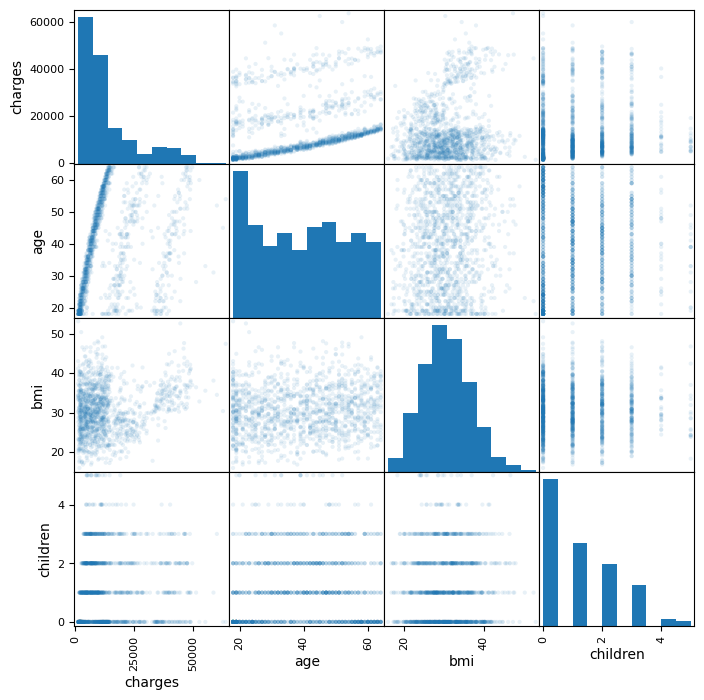

In [ ]:
# Let's look at scatter plots

# There is a positive correlation between charges and age, and charges and bmi
from pandas.plotting import scatter_matrix

attributes = ["charges","age","bmi","children"]
scatter_matrix(insurance_data[attributes],alpha=0.1,figsize=[8,8],diagonal="hist")

In [ ]:
corr_matrix = insurance_data.corr()
corr_matrix["charges"].sort_values(ascending=False)

<ipython-input-118-e5caeaacde30>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = insurance_data.corr()


charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

# Prepare the data for ML algorithms

In [ ]:
# strat_test_set is assigned to the insurance_data DataFrame
# insurance_num contains only numerical data
insurance_data = strat_test_set.drop(["charges","age_cat"],axis=1)
charges_labels = strat_test_set["charges"].copy()
insurance_num  = strat_test_set.drop(["sex","smoker","region","age_cat","charges"],axis=1)

In [ ]:
insurance_num.head()

,age,bmi,children
1070,37,37.070,1
381,55,30.685,0
1332,52,44.700,3
901,60,40.920,0
776,40,32.300,2


In [150]:
# An instance of the SimpleImputer class is used to replace missing values
# Missing values per attribute are replaced with the median value
# of the corresponding attribute

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [151]:
# Computes the median value per category
imputer.fit(insurance_num)

SimpleImputer(strategy='median')

In [154]:
# Have a look at the median values
imputer.statistics_

array([39.5   , 30.6875,  1.    ])

In [156]:
# Let's have a look at the insurance_num's median values per attribute
# before any substitution of the missing values
insurance_num.median(axis=0,skipna=True)

age         39.5000
bmi         30.6875
children     1.0000
dtype: float64

In [158]:
# Impute all missing values in X
X = imputer.transform(insurance_num)
type(X)

numpy.ndarray

In [161]:
# Let's put the transformed features into a pandas DataFrame
insurance_tr = pd.DataFrame(X, columns=insurance_num.columns, index=insurance_num.index)


# Handling categorical attributes

In [181]:
sex_cat = insurance_data[["sex"]]

In [182]:
smoker_cat = insurance_data[["smoker"]]

In [183]:
region_cat = insurance_data[["region"]]

In [185]:
# Use Scikit-Learn's OrdinalEncoder class to convert
# categorical values to numeric values

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [186]:
# Apply Ordinal categorical encoding to:
# sex: female or male
# smoker: yes or no

sex_cat_encoded = ordinal_encoder.fit_transform(sex_cat)
smoker_cat_enconded = ordinal_encoder.fit_transform(smoker_cat)

In [187]:
# One-hot Encoder

from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

In [196]:
# Apply One-Hot encoding to create one binary attribute per category:
# one attribute equal to 1 when the category is equal to "southwest" (and 0 otherwise)
# another attribute equal to 1 when the category is "northwest" (and 0 otherwise).
# "insurance_cat_region" is a sparce matrix storing the matrix indeces of the nonzero elements

region_cat_encoded = one_hot_encoder.fit_transform(region_cat)

In [208]:
one_hot_encoder.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

# Transformations pipeline

In [202]:
# Define a pipeline with a set of transformations
# The transformations are applied sequentially.
# First 'SimpleImputer()' replanes NaN values with the attributes' median
# Second the valus of the attributes are scaled using StandardScaler()

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
    ])

In [203]:
# Define a full pipeline that combines transformers that
# apply to numerical attributes and then applies the scaler
# that acts on the categorical attribute (ocean_proximity)

from sklearn.compose import ColumnTransformer

num_attribs = list(insurance_num)
cat_ordinal_attribs = ["sex","smoker"]
cat_one_hot_attribs = ["region"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat_ordinal", OrdinalEncoder(), cat_ordinal_attribs),
    ("cat_one_hot", OneHotEncoder(), cat_one_hot_attribs),
])

In [204]:
insurance_prepared = full_pipeline.fit_transform(insurance_data)

In [207]:
insurance_prepared[:5]

array([[-0.14667322,  0.96327781, -0.11387958,  1.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ],
       [ 1.12361696, -0.05406008, -0.93873709,  1.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.91190193,  2.17898463,  1.53583544,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
       [ 1.47647534,  1.57670786, -0.93873709,  1.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.06504181,  0.20326187,  0.71097793,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ]])


# Select and train a model
  ### Training and evaluating on the training set

In [210]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [240]:
lin_reg.fit(insurance_prepared, charges_labels)

LinearRegression()

In [247]:
# Get the score
lin_reg.score(insurance_prepared,charges_labels)

0.7314430905369567

In [238]:
# Let's quantify this regression model's RMSE
# The obtained RMSE is not very satisfying

from sklearn.metrics import mean_squared_error
insurance_predictions = lin_reg.predict(insurance_prepared)
lin_mse = mean_squared_error(charges_labels,insurance_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

6288.980536177634

#K-fold cross-validation

In [221]:
# Using K-fold cross-validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, insurance_prepared, charges_labels, scoring="neg_mean_squared_error", cv=5)

In [223]:
lin_rmse_scores = np.sqrt(-scores)

In [248]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [249]:
# From using K-fold cross-validation it is observed that the linear regression model
# has a score of approximately 6539.17 +- 462.02
display_scores(lin_rmse_scores)

Scores: [7034.01184765 5959.45520755 7130.47259855 6351.35361546 6220.59503426]
Mean: 6539.177660694539
Standard deviation: 462.0262894313391


# Evaluate the model on the test set

In [254]:
X_test = strat_test_set.drop("charges", axis=1)
Y_test = strat_test_set["charges"].copy()

X_test_prepared = full_pipeline.fit_transform(X_test)

In [255]:
final_score = lin_reg.score(X_test_prepared,Y_test)

In [257]:
print(final_score)

0.7314430905369567


In [258]:
X_test.head()

,age,sex,bmi,children,smoker,region,age_cat
1070,37,male,37.070,1,yes,southeast,2
381,55,male,30.685,0,yes,northeast,3
1332,52,female,44.700,3,no,southwest,3
901,60,male,40.920,0,yes,southeast,3
776,40,male,32.300,2,no,northwest,2


In [259]:
strat_train_set.head()

,age,sex,bmi,children,smoker,region,charges,age_cat
1106,49,female,29.925,0,no,northwest,8988.15875,3
1180,42,female,41.325,1,no,northeast,7650.77375,3
1240,52,male,41.800,2,yes,southeast,47269.85400,3
1234,45,female,27.830,2,no,southeast,8515.75870,3
345,34,female,29.260,3,no,southeast,6184.29940,2
